In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, accuracy_score, f1_score

### Training data

In [111]:
df = pd.read_csv("./Train.csv")
df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


/Users/aapoh/codes/ghp/zindi-piyipc/env-zindi/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aapoh/codes/ghp/zindi-piyipc/env-zindi/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aapoh/codes/ghp/zindi-piyipc/env-zindi/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


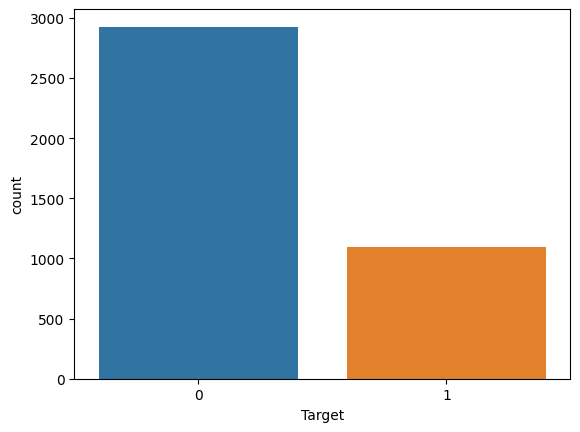

In [140]:
sns.countplot(data=df, x="Target")
plt.show()

In [112]:
df.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math',
       'Mathlit', 'Additional_lang', 'Home_lang', 'Science', 'Female',
       'Sa_citizen', 'Birthyear', 'Birthmonth', 'Target'],
      dtype='object')

In [113]:
# df.columns
df.isnull().sum()

Person_id             0
Survey_date           0
Round                 0
Status                0
Tenure             1394
Geography             0
Province              0
Matric             1008
Degree             1831
Diploma            1809
Schoolquintile     1661
Math               3023
Mathlit            2667
Additional_lang    2002
Home_lang          3639
Science            3288
Female                0
Sa_citizen            0
Birthyear             0
Birthmonth            0
Target                0
dtype: int64

In [114]:
null_columns = [
    "Tenure",
    "Matric",
    "Degree",
    "Diploma",
    "Schoolquintile",
    "Math",
    "Mathlit",
    "Additional_lang",
    "Home_lang",
    "Science",
]

not_null_columns = [ col for col in df.columns if col not in null_columns ]

In [115]:
df = df[ not_null_columns ]
df.head()

,Person_id,Survey_date,Round,Status,Geography,Province,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,Rural,Mpumalanga,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,Suburb,North West,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,Urban,Free State,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,Urban,Eastern Cape,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,Urban,Limpopo,1,1,1998,12,0


In [116]:
status_col_coded = {status: index for index, status in enumerate(df['Status'].unique()) }
status_col_coded

{'studying': 0,
 'unemployed': 1,
 'other': 2,
 'wage employed': 3,
 'self employed': 4,
 'employment programme': 5,
 'wage and self employed': 6}

In [117]:
geography_col_coded = {status:index for index, status in enumerate(df['Geography'].unique())}
geography_col_coded

{'Rural': 0, 'Suburb': 1, 'Urban': 2}

In [118]:
province_col_coded = { status: index for index, status in enumerate(df['Province'].unique()) }
province_col_coded

{'Mpumalanga': 0,
 'North West': 1,
 'Free State': 2,
 'Eastern Cape': 3,
 'Limpopo': 4,
 'KwaZulu-Natal': 5,
 'Gauteng': 6,
 'Western Cape': 7,
 'Northern Cape': 8}

In [119]:
data = df.copy()
data.head()

,Person_id,Survey_date,Round,Status,Geography,Province,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,Rural,Mpumalanga,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,Suburb,North West,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,Urban,Free State,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,Urban,Eastern Cape,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,Urban,Limpopo,1,1,1998,12,0


In [120]:
data['Status'] : pd.DataFrame = df['Status'].map(status_col_coded)
data['Geography'] : pd.DataFrame = df['Geography'].map(geography_col_coded)
data['Province'] : pd.DataFrame = df['Province'].map(province_col_coded)
data.head()

,Person_id,Survey_date,Round,Status,Geography,Province,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,0,0,0,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,1,1,1,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,2,2,2,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,1,2,3,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,0,2,4,1,1,1998,12,0


In [121]:
train_cols = [
    "Round",
    "Status",
    "Geography",
    "Province",
    "Female",
    "Sa_citizen",
    # "Birthyear",
    # "Birthmonth",
]
train_cols

['Round', 'Status', 'Geography', 'Province', 'Female', 'Sa_citizen']

In [122]:
x_train, x_test, y_train, y_test = train_test_split(data[train_cols], data['Target'], test_size=.3, random_state=424 )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2814, 6), (1206, 6), (2814,), (1206,))

### Testing Data

In [123]:
test_df = pd.read_csv("./Test.csv")
test_df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth
0,Id_r90136smvl,2022-08-03,3,other,NaN,Urban,KwaZulu-Natal,1.0,0.0,0.0,2.0,0 - 29 %,NaN,50 - 59 %,NaN,40 - 49 %,0,1,2002,12
1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1.0,0.0,0.0,NaN,NaN,NaN,40 - 49 %,NaN,NaN,1,1,1989,12
2,Id_ap2czff2bu,2023-03-14,4,unemployed,339.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1989,12
3,Id_uhgink7iha,2023-02-16,4,studying,NaN,Urban,Gauteng,1.0,0.0,0.0,1.0,NaN,80 - 100 %,60 - 69 %,NaN,NaN,0,1,2002,11
4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,1,1,1993,10


In [124]:
test_data = test_df[train_cols]
test_data.head()

,Round,Status,Geography,Province,Female,Sa_citizen
0,3,other,Urban,KwaZulu-Natal,0,1
1,4,unemployed,Urban,Western Cape,1,1
2,4,unemployed,Urban,KwaZulu-Natal,1,1
3,4,studying,Urban,Gauteng,0,1
4,4,unemployed,Urban,Gauteng,1,1


In [125]:
test_data['Province'].unique().shape

(9,)

In [126]:
test_data['Geography'] = test_data['Geography'].map(geography_col_coded)
test_data['Province'] = test_data['Province'].map(province_col_coded)
test_data['Status'] = test_data['Status'].map(status_col_coded)

/var/folders/0r/13xz5g6j45589319bn94k47w0000gn/T/ipykernel_31197/1795041406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Geography'] = test_data['Geography'].map(geography_col_coded)
/var/folders/0r/13xz5g6j45589319bn94k47w0000gn/T/ipykernel_31197/1795041406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Province'] = test_data['Province'].map(province_col_coded)
/var/folders/0r/13xz5g6j45589319bn94k47w0000gn/T/ipykernel_31197/1795041406.py:3: SettingWithCopyWarning: 
A valu

In [127]:
test_data.head()

,Round,Status,Geography,Province,Female,Sa_citizen
0,3,2,2,5,0,1
1,4,1,2,7,1,1
2,4,1,2,5,1,1
3,4,0,2,6,0,1
4,4,1,2,6,1,1


### Models

#### Decision Trees

In [128]:
grid_search_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

cls_dt = DecisionTreeClassifier()

grid_search = GridSearchCV(
    estimator=cls_dt, param_grid=grid_search_params, cv=10, scoring="accuracy"
)

grid_search.fit(x_train, y_train)

print(f"{grid_search.best_params_}\n\n")
print(f"{grid_search.best_estimator_}")

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)


In [129]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=4, min_samples_split=2)
# dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

scores = cross_val_score(dt, x_train, y_train, cv=cv, scoring="accuracy")

print(f"mean score: {scores.mean()}")

mean score: 0.8088286514727038


In [130]:
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)
predictions

array([1, 0, 0, ..., 0, 0, 1])

### Metrics

In [131]:
print( classification_report(y_test, predictions, zero_division=1))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       869
           1       0.78      0.46      0.58       337

    accuracy                           0.81      1206
   macro avg       0.80      0.71      0.73      1206
weighted avg       0.81      0.81      0.80      1206



In [132]:
accuracy_score(y_test, predictions)

0.8126036484245439

In [133]:
f1_score(y_test, predictions)

0.5799256505576208

### Test Data Eval

In [134]:
test_eval = dt.predict(test_data)
test_eval

array([1, 0, 0, ..., 0, 0, 0])

In [135]:
df_submission = pd.DataFrame({"ID": test_df['Person_id'], "Target": test_eval.astype(int)})
df_submission.head()

,ID,Target
0,Id_r90136smvl,1
1,Id_wawdqhmu6s,0
2,Id_ap2czff2bu,0
3,Id_uhgink7iha,0
4,Id_5j6bzk3k81,0


In [136]:
df_submission.to_csv("submission.csv", index=False)